# Phishing Domain Detection

## Problem Statement:
Phishing is a type of fraud in which an attacker impersonates a reputable company or
person in order to get sensitive information such as login credentials or account
information via email or other communication channels. Phishing is popular among
attackers because it is easier to persuade someone to click a malicious link that appears
to be authentic than it is to break through a computer's protection measures.

### Import Statements


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.utils import shuffle


# hide warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/MajorProject/phishing_site_urls.csv")

### Exploratory Data Analysis

In [4]:
#contents of dataset
print(df.shape)
df.head(5)

(549346, 2)


,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [5]:
df.describe().T

,count,unique,top,freq
URL,549346,507195,jhomitevd2abj3fk.tor2web.org/,52
Label,549346,2,good,392924


In [6]:
#Checking for Null Values
df.isnull().sum()

URL      0
Label    0
dtype: int64

<Axes: ylabel='Label'>

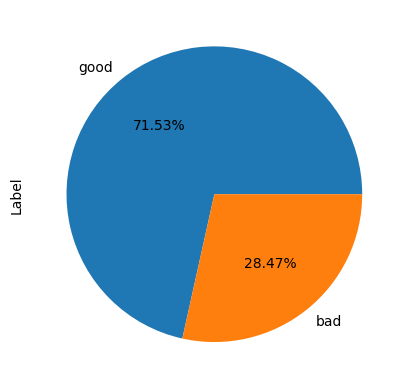

In [7]:
#plot of data
df['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')

### Data Sampling

In [8]:
df_shuffled = shuffle(df, random_state=42)
data_size = 5000
df_sampled = df_shuffled[:data_size].copy()

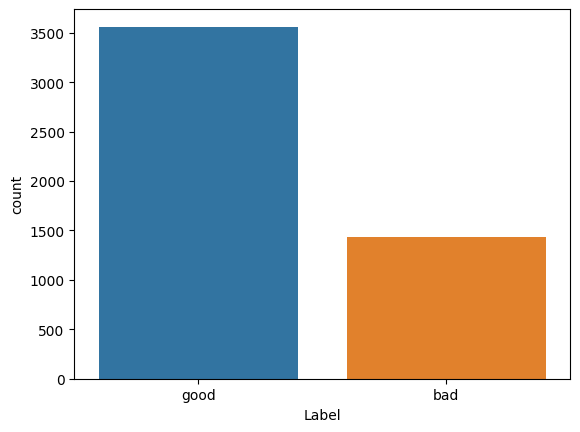

In [9]:
#Make sure the distribution is the same after taking the sample
sns.countplot(data=df_sampled, x="Label")
plt.show()

In [10]:
df_sampled.info()
df_sampled.replace({'good':0, 'bad':1}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 452638 to 170545
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL     5000 non-null   object
 1   Label   5000 non-null   object
dtypes: object(2)
memory usage: 117.2+ KB


### Data Preprocessing

In [11]:
#Selecting Features and Target variables
X_raw=df_sampled[["URL"]]
y=df_sampled["Label"]

In [12]:
#Tokenization, Stemming, Vectorization
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
stemmer = SnowballStemmer("english")
cv = CountVectorizer()


def prepare_data(X) :
    X['text_tokenized'] = X.URL.map(lambda t: tokenizer.tokenize(t))
    X['text_stemmed'] = X.text_tokenized.map(lambda t: [stemmer.stem(word) for word in t])
    X['text_sent'] = X.text_stemmed.map(lambda t: ' '.join(t))
    features = cv.fit_transform(X.text_sent)
    return X, features

X_raw, X = prepare_data(X_raw)

### Splitting Data into Training and Testing

In [13]:
#Train Test Split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state = 42)

### Comparison Pre Processing

In [14]:
#variable declaration to store values
ml_model = []
accuracy = []
f1_score = []
recall = []
precision = []


#function to add results
def storeResults(model,acc,f1,rec,prec):
    ml_model.append(model)
    accuracy.append(round(acc, 3))
    f1_score.append(round(f1, 3))
    recall.append(round(rec, 3))
    precision.append(round(prec ,3))

### Testing Models

*   Logistic Regression



In [15]:
#instantiate the model
log = LogisticRegression()

#fit the model
log.fit(X_train,y_train)

#predicting the target value from the model for the samples
y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)


#computing accuracy, score, recall, precision of the model
acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)

print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()


f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))



Logistic Regression : Accuracy on training Data: 0.967
Logistic Regression : Accuracy on test Data: 0.887

Logistic Regression : f1_score on training Data: 0.939
Logistic Regression : f1_score on test Data: 0.785

Logistic Regression : Recall on training Data: 0.890
Logistic Regression : Recall on test Data: 0.694

Logistic Regression : precision on training Data: 0.993
Logistic Regression : precision on test Data: 0.904


In [16]:
#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       703
           1       0.90      0.69      0.78       297

    accuracy                           0.89      1000
   macro avg       0.89      0.83      0.85      1000
weighted avg       0.89      0.89      0.88      1000



In [17]:

#Store the results
storeResults('Logistic Regression',acc_test_log,f1_score_test_log,recall_score_train_log,precision_score_train_log)

 * K-Nearest Neighbors : Classifier



In [18]:
#instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

#fit the model
knn.fit(X_train,y_train)

#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

#computing accuracy, score, recall, precision of the model
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 1.000
K-Nearest Neighbors : Accuracy on test Data: 0.814

K-Nearest Neighbors : f1_score on training Data: 1.000
K-Nearest Neighbors : f1_score on test Data: 0.694

K-Nearest Neighborsn : Recall on training Data: 1.000
Logistic Regression : Recall on test Data: 0.710

K-Nearest Neighbors : precision on training Data: 0.999
K-Nearest Neighbors : precision on test Data: 0.678


In [19]:

#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       703
           1       0.68      0.71      0.69       297

    accuracy                           0.81      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.82      0.81      0.82      1000



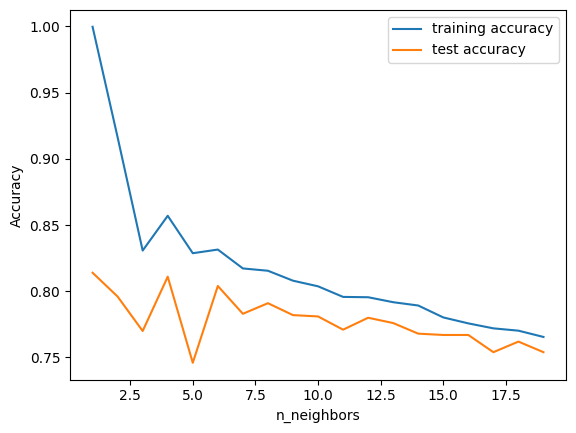

In [20]:
#tuning hyperparameters for KNN
training_accuracy = []
test_accuracy = []
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))




#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

In [21]:
#store results
storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,recall_score_train_knn,precision_score_train_knn)

* Support Vector Machine : Classifier

In [22]:
# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

#instantiating the model
svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

#computing accuracy, score, recall, precision of the model
acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 1.000
Support Vector Machine : Accuracy on test Data: 0.892

Support Vector Machine : f1_score on training Data: 0.999
Support Vector Machine : f1_score on test Data: 0.798

Support Vector Machine : Recall on training Data: 0.999
Support Vector Machine : Recall on test Data: 0.717

Support Vector Machine : precision on training Data: 0.999
Support Vector Machine : precision on test Data: 0.899


In [23]:
#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_svc))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       703
           1       0.90      0.72      0.80       297

    accuracy                           0.89      1000
   macro avg       0.89      0.84      0.86      1000
weighted avg       0.89      0.89      0.89      1000



In [24]:
#Store the results
storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,recall_score_train_svc,precision_score_train_svc)

* Decision Tree

In [25]:
#instantiate the model
tree = DecisionTreeClassifier(max_depth=25)

#fit the model
tree.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

#computing accuracy, score, recall, precision of the model
acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))


Decision Tree : Accuracy on training Data: 0.918
Decision Tree : Accuracy on test Data: 0.868

Decision Tree : f1_score on training Data: 0.843
Decision Tree : f1_score on test Data: 0.756

Decision Tree : Recall on training Data: 0.772
Decision Tree : Recall on test Data: 0.690

Decision Tree : precision on training Data: 0.928
Decision Tree : precision on test Data: 0.837


In [26]:
#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       703
           1       0.84      0.69      0.76       297

    accuracy                           0.87      1000
   macro avg       0.86      0.82      0.83      1000
weighted avg       0.87      0.87      0.86      1000



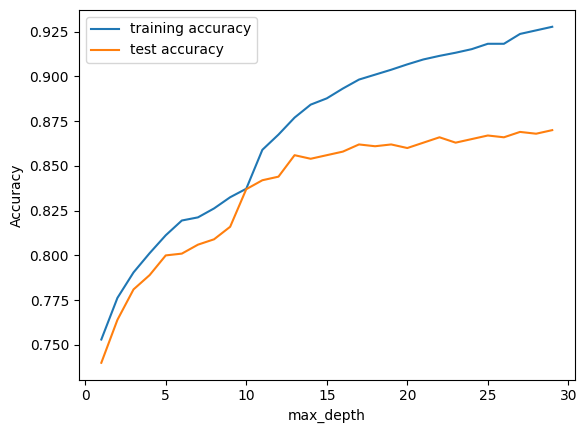

In [27]:
#Hyperparamter Tuning
training_accuracy = []
test_accuracy = []

depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy


    test_accuracy.append(tree_test.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend();

In [28]:
#Store the results
storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,recall_score_train_tree,precision_score_train_tree)

* Random Forest

In [29]:
#instantiate the model
forest = RandomForestClassifier(n_estimators=13)

#fit the model
forest.fit(X_train,y_train)

#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

#computing accuracy, score, recall, precision of the model
acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.992
Random Forest : Accuracy on test Data: 0.891

Random Forest : f1_score on training Data: 0.985
Random Forest : f1_score on test Data: 0.790

Random Forest : Recall on training Data: 0.973
Random Forest : Recall on test Data: 0.690

Random Forest : precision on training Data: 0.998
Random Forest : precision on test Data: 0.837


In [30]:
#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       703
           1       0.92      0.69      0.79       297

    accuracy                           0.89      1000
   macro avg       0.90      0.83      0.86      1000
weighted avg       0.89      0.89      0.89      1000



In [31]:
#Store the results
storeResults('Random Forest',acc_test_forest,f1_score_test_forest,recall_score_train_forest,precision_score_train_forest)

* Gradient Descent

In [32]:
#instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

#fit the model
gbc.fit(X_train,y_train)

#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

#computing accuracy, score, recall, precision of the model
acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boost: Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boost: Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boost : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boost : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc = metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boost : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boost : Recall on test Data: {:.3f}".format(recall_score_train_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boost : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boost : precision on test Data: {:.3f}".format(precision_score_train_gbc))

Gradient Boost: Accuracy on training Data: 0.979
Gradient Boost: Accuracy on test Data: 0.857

Gradient Boost : f1_score on training Data: 0.962
Gradient Boost : f1_score on test Data: 0.701

Gradient Boost : Recall on training Data: 0.929
Gradient Boost : Recall on test Data: 0.929

Gradient Boost : precision on training Data: 0.997
Gradient Boost : precision on test Data: 0.997


In [33]:
#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       703
           1       0.92      0.57      0.70       297

    accuracy                           0.86      1000
   macro avg       0.88      0.77      0.80      1000
weighted avg       0.87      0.86      0.85      1000



In [34]:
#Store the results
storeResults('Gradient Boost ',acc_test_gbc,f1_score_test_gbc,recall_score_train_gbc,precision_score_train_gbc)

### Analysing Results

In [35]:
#Converting Results to dataframe

result = pd.DataFrame({ 'ML Model' : ml_model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.887,0.785,0.890,0.993
1,K-Nearest Neighbors,0.814,0.694,1.000,0.999
2,Support Vector Machine,0.892,0.798,0.999,0.999
3,Decision Tree,0.868,0.756,0.772,0.928
4,Random Forest,0.891,0.790,0.973,0.998
5,Gradient Boost,0.857,0.701,0.929,0.997


In [36]:
#Sorting the datafram on accuracy

sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Support Vector Machine,0.892,0.798,0.999,0.999
1,Random Forest,0.891,0.790,0.973,0.998
2,Logistic Regression,0.887,0.785,0.890,0.993
3,Decision Tree,0.868,0.756,0.772,0.928
4,Gradient Boost,0.857,0.701,0.929,0.997
5,K-Nearest Neighbors,0.814,0.694,1.000,0.999


### Saving the best model

In [37]:
#exporting the model using pickle

import pickle

with open("PhishingDomainDetection.pkl", "wb") as file:
  pickle.dump(svc,file)